<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_3%EC%B0%A8%EC%8B%9C_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D1_%EC%84%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 회귀분석의 목적은 오차가 가장 적은 모델을 만드는 것
- 수학적으로 설명이 가능한 함수 모형을 찾기란 사실상 불가능!  
오차 = 모델로  구한 직선 - 실제 데이터  
오차함수, 코스트 펑션, 에러 함수  
절대값 거리 : |f(x)-y|  
민코프스키 거리 : {sum(|f(x)-y|)^n}^(1/n)  
제곱거리 : (f(x)-y)^2  

General Linear Model  
y_i = W^T * X_i + W_0 = sum(from j=0 to N)(W^j * X_i^j)  

Cost Function(비용 함수) :  
sum_i = (y-y_i)^2 = sum_i (e_i)^2 = sum_i (y - sum(from j=0 to N)(w^j*(x_i)^j))^2  
=> 관측값과 이론치의 차이를 의미  

회귀분석 : 보통 수치값을 예측하는 지도학습  
데이터를 잘 적합시킨다는 의미  
: 비용함수 또는 오차함수를 최소로 만드는 그래프를 구하는 것!  
: Cost Function이 최소가 되는 방향으로 움직이는 모델을 찾는 것!  
'최소제곱추정'을 이용해서 회귀모델을 구하게 됨  
최소제곱법 : 잔차의 제곱을 최소로 만드는 방향으로 모형을 적합하는 것  
사회과학 - 직선형 회귀모델  
자연과학 - 비선형 회귀모델  
비선형회귀모델 (일반 회귀모형) 그래프  
x축 : 독립변수, y축 : 반응변수  
=> 회귀분석이론은 매우 어렵고 양이 방대함!  
  
회귀분석 개념  
y=f(x)  
x : 관측값(독립변수)  
y : 예측값(반응변수, 종속변수)  
  
회귀모형의 종류  
- 선형 회귀 : y가 x의 일차식으로 이루어진 회귀모형
- 비선형 회귀 : 선형이 아닌 모든 회귀모형
- 단순 회귀 : 독립변수가 1개인 회귀모형(선형, 비선형)
- 다중 회귀 : 독립변수가 2개 이상인 회귀모형(선형, 비선형)  
보통 비즈니스에서는 다중선형회귀의 경우가 가장 많다.

회귀모델의 평가방법은?
- 결정계수(R-squared) : 모형이 얼마나 데이터를 잘 설명하는지 나타내는 지수  
(참고 : 결정계수가 너무 높으면 오버피팅(overfitting)의 경향이 있다고 의심되므로, 오버피팅은 트레이닝 데이터에 너무 적합하게 모델이 만들어져 테스트 데이터의 정확도가 떨어지는 현상입니다.)  
=> 0~1 사이의 값  
사회과학 : 0.6 이상, 자연과학 : 0.9 이상  
일반적으로는 0.7 이상은 되어야 쓸만한 모형이라고 주관적으로 판단  
  
- F값과 P-value  
회귀모형의 신뢰도를 통계적으로 평가하기 위하여 사용  
[1] F값 : 회귀모델의 신뢰성을 평가하는 수치  
: 값이 클수록 모델의 신뢰도가 높음  
[2] T값 : 회귀모델의 계수 신뢰도를 평가하는 수치  
[3] P-value : 값이 0.05 or 0.01보다 작아야 안정된 모형으로 판단함  


기울기 :  [[0.63482159]]
절편 :  [0.12628453]
결정계수 :  0.1064571423759525


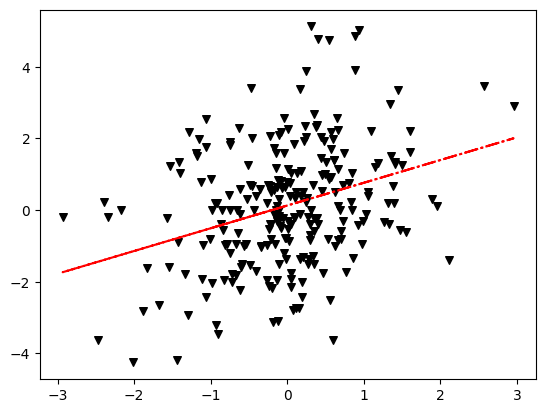

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# 데이터를 읽어옴
h_stock = pd.read_csv('H_stock.csv')
s_stock = pd.read_csv('S_stock.csv')
k_index = pd.read_csv('K_index.csv')

# 헤더정보를 제거함
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

# 선형회귀모델함수에 넣기 위하여 reshape으로 차원조정 [예: (248,) --> (248, 1)]
h_rate = h_rate.reshape(h_rate.shape[0],1)
s_rate = s_rate.reshape(s_rate.shape[0],1)
k_rate = k_rate.reshape(k_rate.shape[0],1)

plt.scatter(k_rate, h_rate, c='black', s=30, marker='v', label='train')

model = linear_model.LinearRegression()
model.fit(k_rate, h_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', color='red')

print('기울기 : ', model.coef_) # 회귀분석의 기울기는 매우 중요!!
print('절편 : ', model.intercept_)
print('결정계수 : ', model.score(k_rate, h_rate)) # 회귀분석 모델의 설명력을 의미

Insight : 코스피지수와 H 회사의 주가지수는 서로 63%의 영향력이 있음!!

In [ ]:
h_stock

,date,h_price,h_rate
0,2015-03-25,45500,NaN
1,2015-03-26,45900,0.879
2,2015-03-27,45000,-1.961
3,2015-03-30,45600,1.333
4,2015-03-31,46000,0.877
...,...,...,...
244,2016-03-21,60100,0.839
245,2016-03-22,59200,-1.498
246,2016-03-23,58900,-0.507
247,2016-03-24,59300,0.679


In [ ]:
k_rate

array([[-0.991],
       [-0.136],
       [ 0.507],
       [ 0.541],
       [-0.616],
       [ 0.031],
       [ 0.806],
       [ 0.049],
       [ 0.029],
       [ 0.597],
       [-0.019],
       [ 1.403],
       [ 0.535],
       [ 0.61 ],
       [ 0.39 ],
       [ 0.941],
       [ 0.168],
       [ 0.15 ],
       [-0.089],
       [-0.042],
       [ 1.377],
       [-0.626],
       [-0.105],
       [-0.457],
       [-0.235],
       [-0.722],
       [ 0.238],
       [-1.297],
       [-0.645],
       [-0.262],
       [ 0.569],
       [-0.029],
       [ 0.829],
       [ 0.292],
       [-0.652],
       [ 0.343],
       [ 0.337],
       [ 0.881],
       [-0.782],
       [ 1.097],
       [-0.121],
       [-1.679],
       [ 0.161],
       [ 0.185],
       [-0.588],
       [-1.129],
       [-0.745],
       [ 0.47 ],
       [-0.23 ],
       [-0.141],
       [-0.056],
       [-0.616],
       [ 0.258],
       [-0.216],
       [-0.48 ],
       [-0.666],
       [ 0.303],
       [ 0.345],
       [ 0.249

기울기 :  [[1.00132771]]
절편 :  [-0.03500143]
결정계수 :  0.2644483831226938


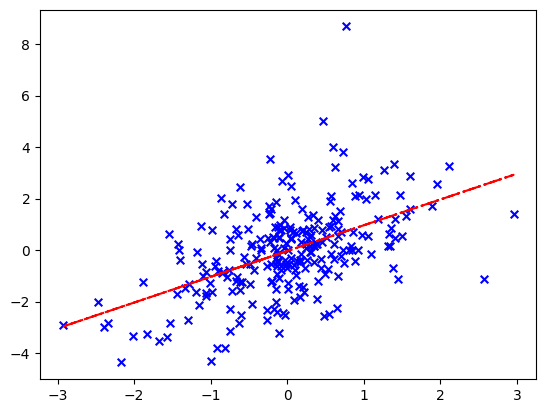

In [ ]:
plt.scatter(k_rate, s_rate, c='blue', s=30, marker='x', label='s rate')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', color='red')

print('기울기 : ', model.coef_)
print('절편 : ', model.intercept_)
print('결정계수 : ', model.score(k_rate, s_rate))

insight : 코스피지수가 S회사 주가지수에 미치는 영향력이 더 큼!! (결정계수의 비교 측면)
=> 베타지수가 크면 공격성향이 큰 주가로 판단

코스피지수가 증가함에 따라 주가지수가 증가한다!!
위의 기울기를 베타지수라고 함.